## Series Temporais

### Introdução

A previsão de séries temporais é uma área extremamente importante em estatística e consequentemente em Machine Learning.
Essa área muitas vezes é deixada de lado. Isso causa muita estranheza mesmo porque muitos fenomenos tem influência do tempo.

É importante porque existem muitos problemas de previsão que envolvem um componente de tempo. Além do que, temos muitos problemas de negócio em que as variáveis de interesse mudam em função do tempo! Esses problemas são negligenciados porque é esse componente do tempo que dificulta o manuseio dos problemas de séries temporais.


### Séries Temporais
Uma série temporal é um conjunto sequencial de pontos de dados, medido tipicamente em tempos sucessivos.

É matematicamente definido como um conjunto de vetores x(t), t = 0,1,2, ... onde t representa o tempo decorrido.

A variável x(t) é tratada como uma variável aleatória.

As medições realizadas durante um evento em uma série temporal são organizadas em uma ordem cronológica adequada.

Uma série temporal contendo registros de uma única variável é denominada como univariada e mais de uma variável como multivariada.

Para começar vamos entrar compacotes exigidos:

In [9]:
import sys
import warnings

In [10]:
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [11]:
# Imports para manipulação de dados
import pandas as pd
import numpy as np

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

In [12]:
# Imports análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [14]:
dados= pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset1.csv', header=None)

In [15]:
#olhando as primeiras 5 linhas
dados.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


 Esses dados representam uma série univariada, pois temos uma variável aleatória x (número de passageiros) e a data, que representa o índice da série.

Porém os nomes estão estranhos, vamos ajustar esses nomes!

In [16]:
dados.columns=['mês','passageiros']

Vendo os dados de novamente:

In [17]:
dados.head()

,mês,passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Podemos resumir esses dados e verificar estatísticas da série

In [18]:
dados.describe()

,passageiros
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


O resultado acima nos dão várias informações, mas uma que chama a atenção é a media maior que a mediana, o que pode indicar assimetria.

In [19]:
# Qual será o mês com menor número de passageiros?

dados.min()

mês            1949-01
passageiros        104
dtype: object

In [20]:
#r: janeiro de 1949

In [21]:
#Vamos colocar o range de nossos dados:
print( 'Inicio do periodo dos dados : {} \n Final do periodo dos dados: {}'.format(dados.mês.min(), dados.mês.max()))

Inicio do periodo dos dados : 1949-01 
 Final do periodo dos dados: 1960-12


In [22]:
#formato dos dados
dados.shape

(144, 2)

In [23]:
#tipos de dados:

dados.dtypes

mês            object
passageiros     int64
dtype: object

In [24]:
# a coluna de data esta como object que é string por isso precisa ajustar


In [25]:
#tipo de objeto
type(dados)

pandas.core.frame.DataFrame

In [26]:
dados['mês']= pd.to_datetime(dados['mês'], format= '%Y-%m')

In [27]:
dados.dtypes

mês            datetime64[ns]
passageiros             int64
dtype: object

In [28]:
dados.head()

,mês,passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [29]:
#a coluna de data deve ser um indice não uma variavel
dados_serie= dados.set_index('mês')

In [30]:
dados_serie.head()

,passageiros
mês,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Observe que o mês virou indice. Agora sim temos uma série temporal

In [31]:
#vendo os indices:
dados_serie.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'], dtype='datetime64[ns]', name='mês', length=144, freq=None)

In [32]:
#Valores nulos há?

dados_serie.isnull().sum()

passageiros    0
dtype: int64

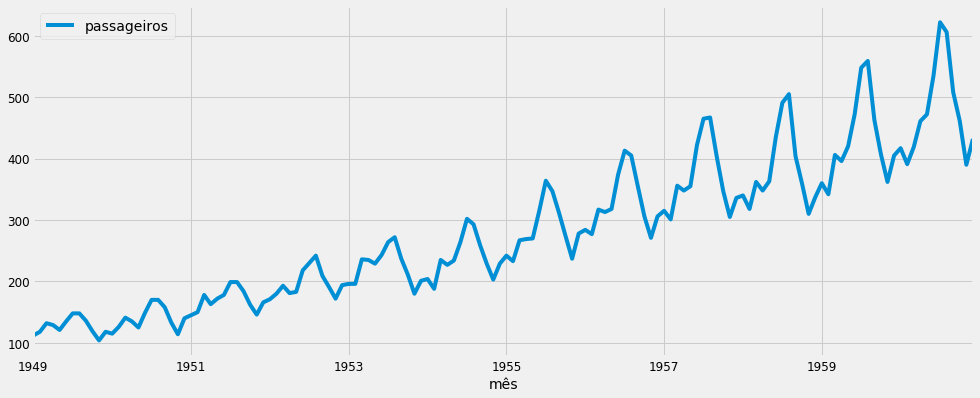

In [34]:
dados_serie.plot(figsize=(15,6))
plt.show()

O gráfico da série acima tem 2 dos componentes de uma série:

- Sazonalidade - o fenômeno se repete em períodos fixos.
- Tendência - ao longo do tempo, a série segue uma tendência de crescimento.

Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito "cíclico" com efeito "sazonal".

Então, como diferenciar um padrão "cíclico" versus "sazonal"?

Se os padrões não tiverem frequências fixas baseadas em calendário, será cíclico. Porque, diferentemente da sazonalidade, os efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.

Analisar o gráfico da densidade de observações pode fornecer mais informações sobre a estrutura dos dados. Vamos criar o gráfico:


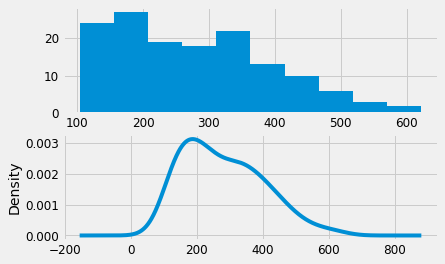

In [35]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
dados_serie.passageiros.hist()

# Subplot 2
plt.subplot(212)
dados_serie.passageiros.plot(kind = 'kde')
plt.show()

Belo gráfico não é?

Análise:

A distribuição não é perfeitamente gaussiana (distribuição normal).

A distribuição está inclinada para a esquerda.

As transformações podem ser úteis antes da modelagem.

Pelo fato de ser inclinada para a esquerda a média é maior que a mediana. Mas isso você já sabia quando usou a função "describe" não é?

Continuamos depois!

Keep calm and analysing data!